* 1. What was the change in price of the stock over time?
* 2. What was the daily return of the stock on average?
* 3. What was the moving average of the various stocks?
* 4. What was the correlation between different stocks'?
* 5. How much value do we put at risk by investing in a particular stock?
* 6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

# Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. 

## 1. What was the change in price of the stock over time?

In [1]:
!pip install -q yfinance


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")
%matplotlib inline
sns.set_style("whitegrid")
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

# For time stamps
from datetime import datetime

In [3]:
# The tech stocks we'll use for this analysis
tech_list=['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end=datetime.now()
start=datetime(end.year -1,end.month,end.day)


for stock in tech_list:
    globals()[stock]=yf.download(stock,start,end)
    
company_list=[AAPL,GOOG,MSFT,AMZN]
company_name=["APPLE","GOOGLE","MICROSOFT","AMAZON"]

for company,com_name in zip(company_list,company_name):
    company["company_name"]=com_name
    
df=pd.concat(company_list,axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-12-13,228.399994,230.199997,225.860001,227.460007,227.460007,28768100,AMAZON
2024-12-16,230.229996,233.000000,228.009995,232.929993,232.929993,37552100,AMAZON
2024-12-17,232.389999,232.729996,227.850006,231.149994,231.149994,35948100,AMAZON
2024-12-18,230.770004,231.399994,220.110001,220.520004,220.520004,43281400,AMAZON
2024-12-19,224.910004,226.089996,222.919998,223.289993,223.289993,39918700,AMAZON
2024-12-20,219.839996,226.210007,218.729996,224.919998,224.919998,88279200,AMAZON
2024-12-23,225.009995,226.880005,223.899994,225.059998,225.059998,28070000,AMAZON
2024-12-24,226.940002,229.139999,226.130005,229.050003,229.050003,15007500,AMAZON
2024-12-26,228.500000,228.500000,226.669998,227.050003,227.050003,16146700,AMAZON


In [4]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,206.589280,208.554480,204.857440,206.853080,206.413754,5.728397e+07
std,25.104580,25.369676,24.908138,25.295682,25.505410,3.090578e+07
min,165.350006,166.399994,164.080002,165.000000,164.405121,2.323470e+07
25%,183.642502,185.104996,182.155003,184.174995,183.385338,4.197185e+07
50%,213.889999,216.764999,211.760002,214.170006,213.687302,4.999210e+07
75%,227.267502,229.262505,225.037502,227.322495,227.032825,6.312158e+07
max,258.190002,260.100006,257.630005,259.019989,259.019989,3.186799e+08


In [5]:
# General Info
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,206.589280,208.554480,204.857440,206.853080,206.413754,5.728397e+07
std,25.104580,25.369676,24.908138,25.295682,25.505410,3.090578e+07
min,165.350006,166.399994,164.080002,165.000000,164.405121,2.323470e+07
25%,183.642502,185.104996,182.155003,184.174995,183.385338,4.197185e+07
50%,213.889999,216.764999,211.760002,214.170006,213.687302,4.999210e+07
75%,227.267502,229.262505,225.037502,227.322495,227.032825,6.312158e+07
max,258.190002,260.100006,257.630005,259.019989,259.019989,3.186799e+08


In [6]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-01-02 to 2024-12-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## Closing Price

The closing price refers to the final price at which a stock, bond, commodity, or other financial asset is traded on a particular trading day. It represents the last transaction price before the market closes for the day. The closing price is often used as a benchmark to evaluate the performance of an asset, as well as for technical and fundamental analysis.

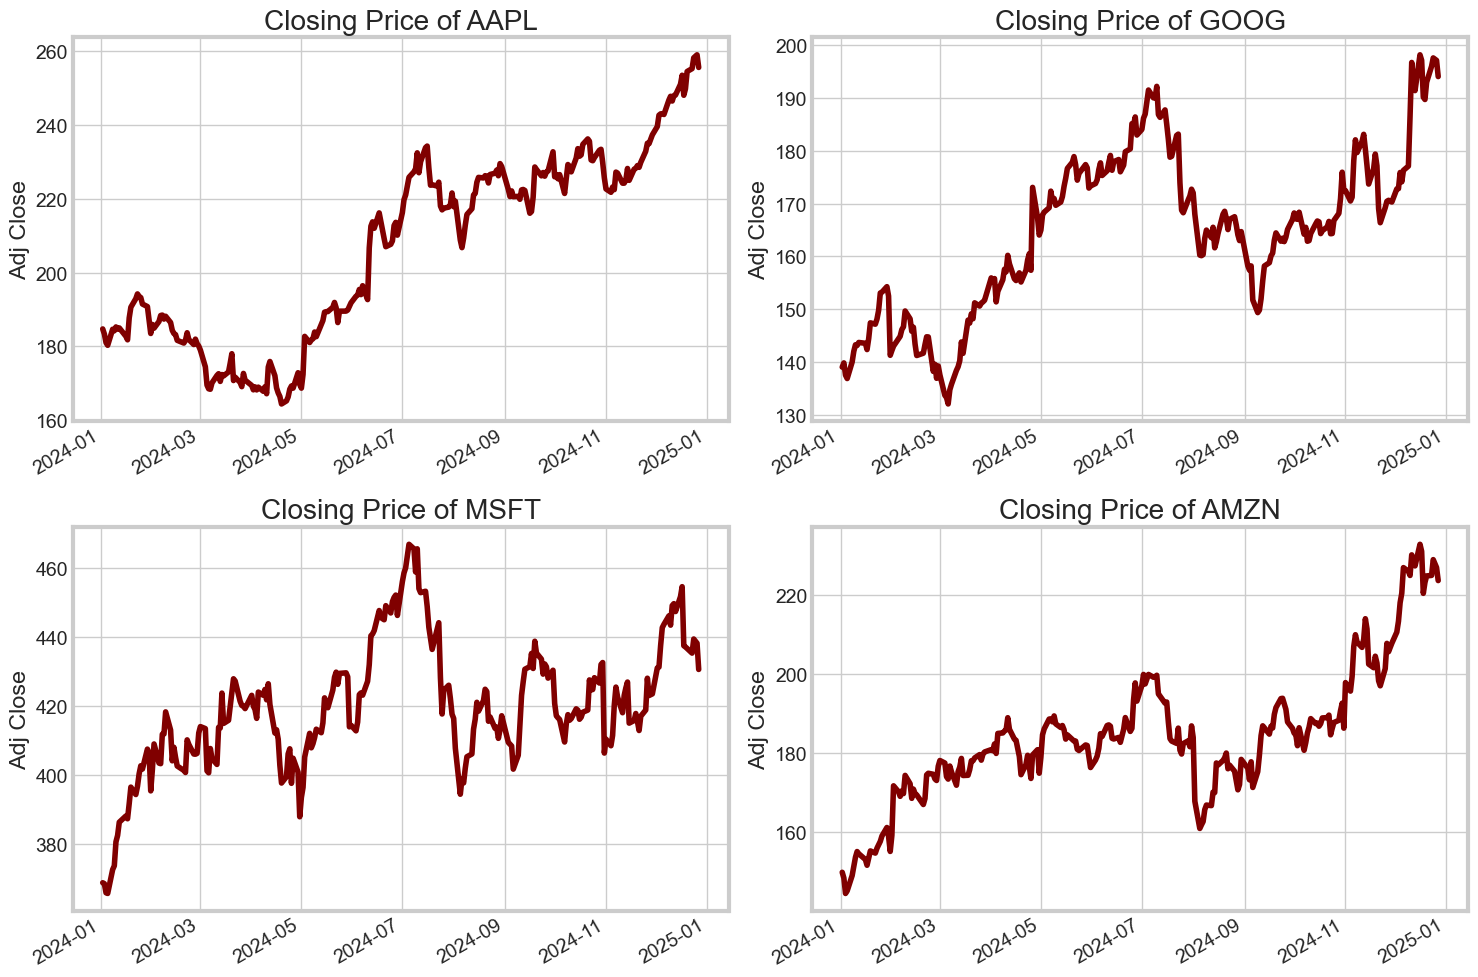

In [7]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15,10))

plt.subplots_adjust(top=1.25,bottom=1.2)

for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot(color='maroon')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")
    
plt.tight_layout()
    

## Volume of Sales
Volume refers to the total number of shares of a stock or security traded during a specific period, typically in a single trading day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close.

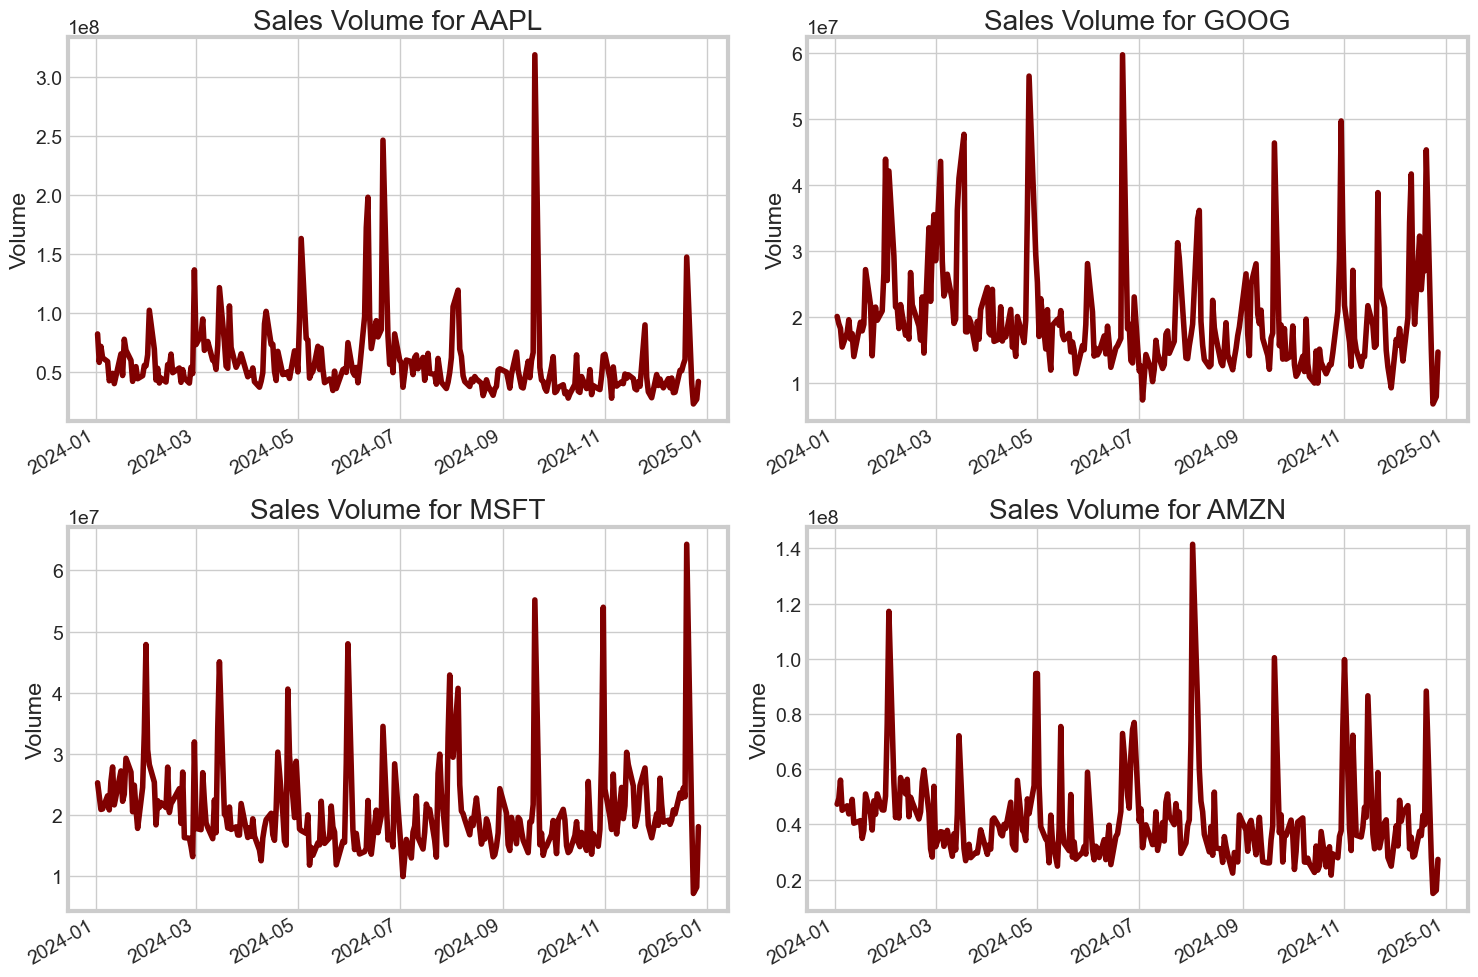

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25,bottom=1.2)

for i , company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot(color='maroon')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i-1]}")
    
plt.tight_layout()

## 2. What was the moving average of the various stocks?

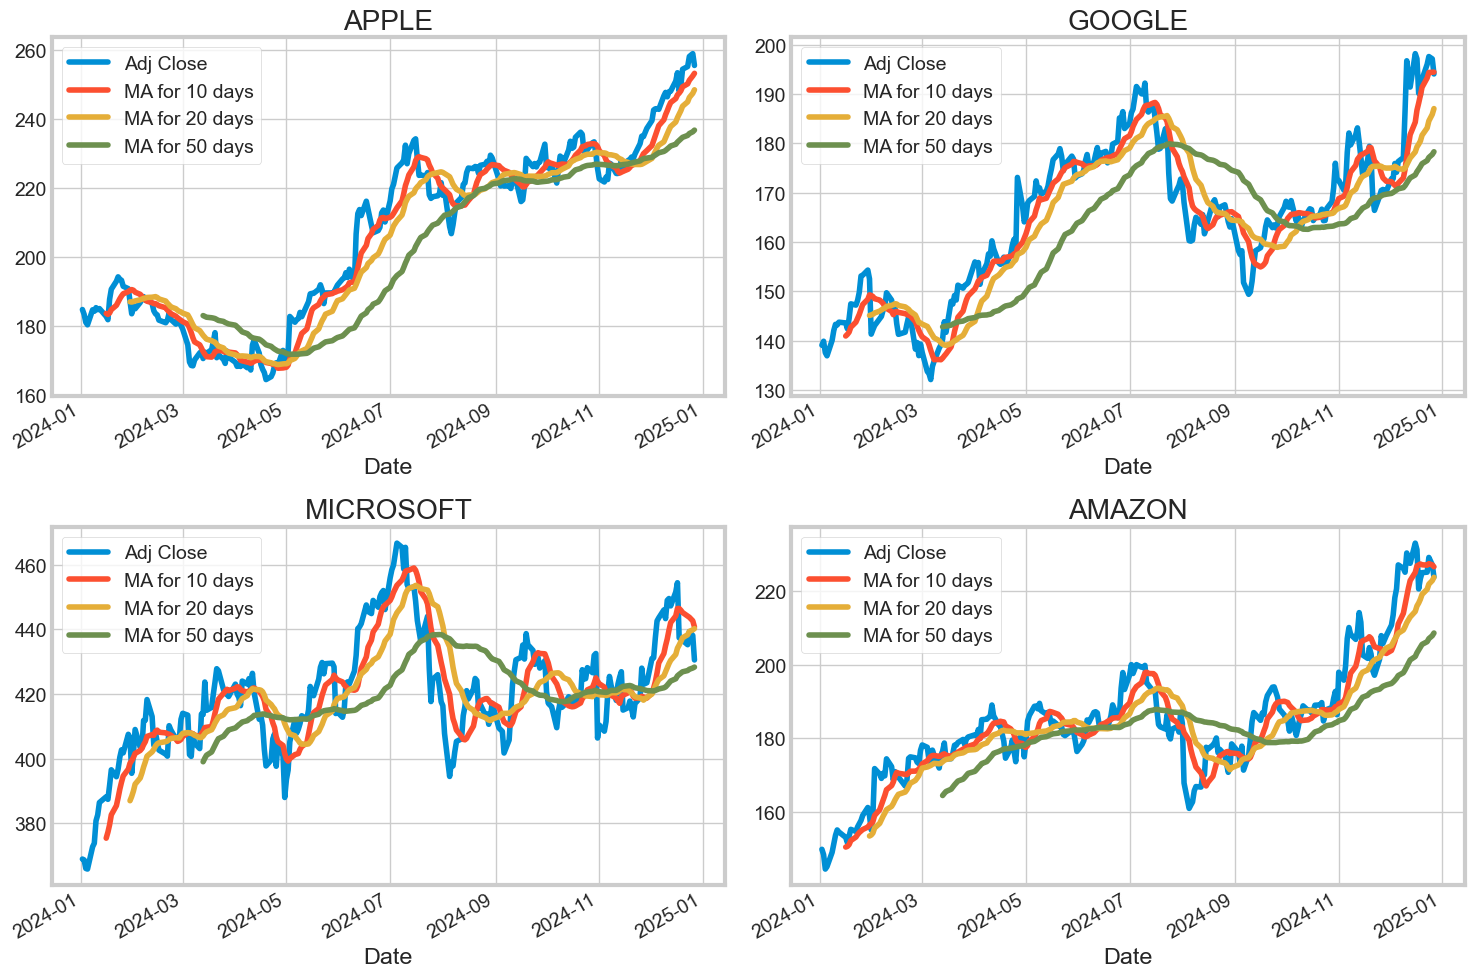

In [9]:
day = [10,20,50]

for ma in day:
    for company in company_list:
        column_name=f"MA for {ma} days"
        company[column_name]=company['Adj Close'].rolling(ma).mean()
        
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close' ,'MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title("GOOGLE")

MSFT[['Adj Close' ,'MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title("MICROSOFT")

AMZN[['Adj Close' ,'MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title("AMAZON")

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

## 3. What was the daily return of the stock on average?

Now that we have done some baseline analysis , let's move further and dive a little deeper . We are now going to analyze the risk of the stock .  In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value

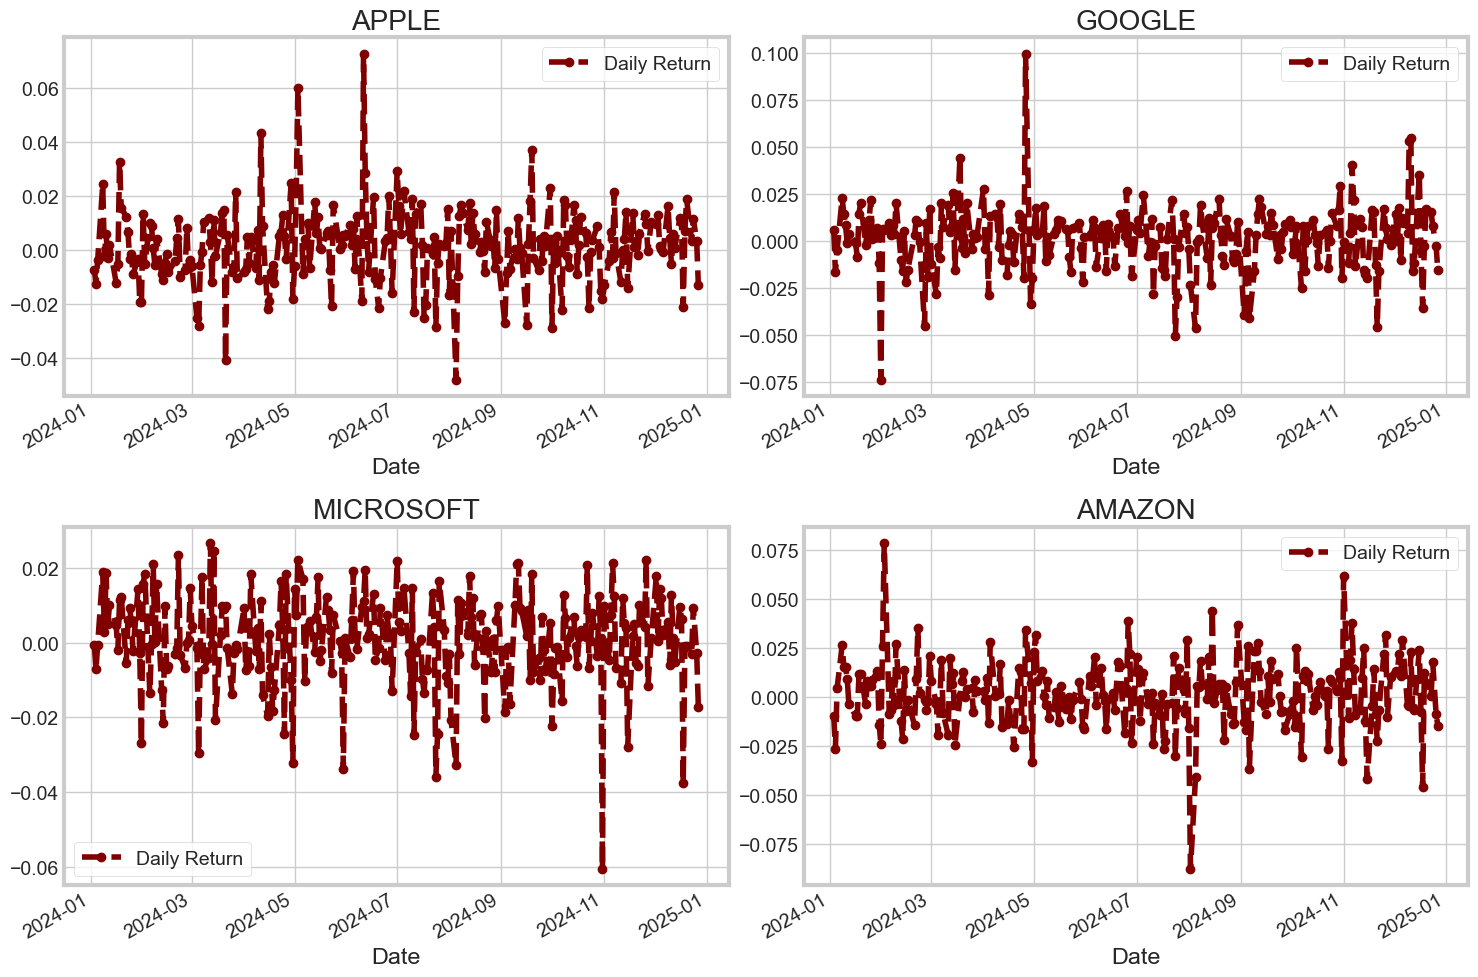

In [10]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0],legend=True,linestyle='--',marker='o',color='maroon')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1],legend=True,linestyle='--',marker='o',color='maroon')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0],legend=True,linestyle='--',marker='o',color='maroon')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1],legend=True,linestyle='--',marker='o',color='maroon')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

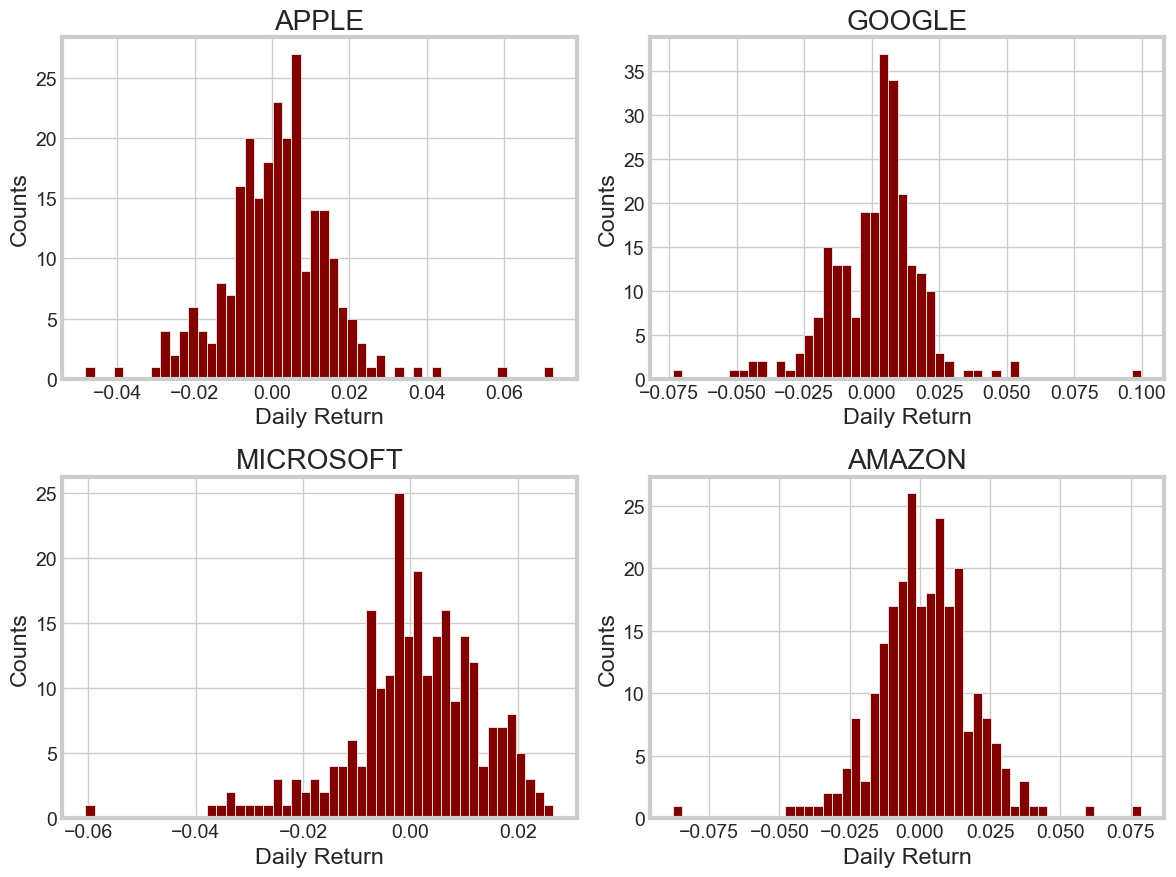

In [11]:
plt.figure(figsize=(12,9))

for i ,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50,color='maroon')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')
    
plt.tight_layout()

## 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1 and +1. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor

In [12]:
# Grab all the closing prices for the tech stock list into one DataFrame
close_df=pdr.get_data_yahoo(tech_list,start=start,end=end)['Adj Close']

# Make a new tech returns DataFrame

tech_returns= close_df.pct_change()
tech_returns.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-01-02,NaN,NaN,NaN,NaN
2024-01-03,-0.007488,-0.009738,0.005732,-0.000728
2024-01-04,-0.012700,-0.026268,-0.016529,-0.007178
2024-01-05,-0.004013,0.004634,-0.004709,-0.000516
2024-01-08,0.024175,0.026577,0.022855,0.018872


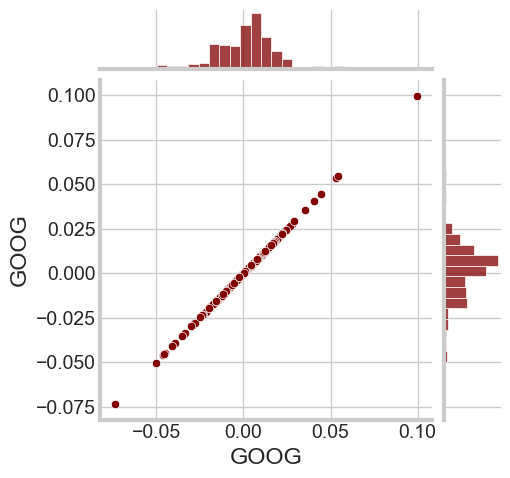

In [13]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG',y='GOOG',data=tech_returns,kind='scatter',color='maroon',height=5)

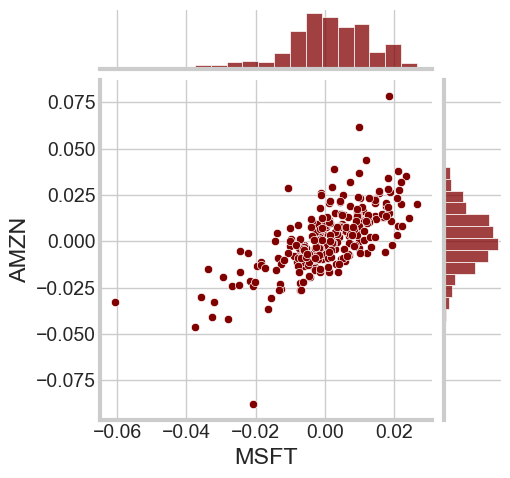

In [14]:
# We'll use joinplot to compare the daily returns of Amazon and Microsoft
sns.jointplot(x='MSFT',y='AMZN',data=tech_returns,kind='scatter',color='maroon',height=5)

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

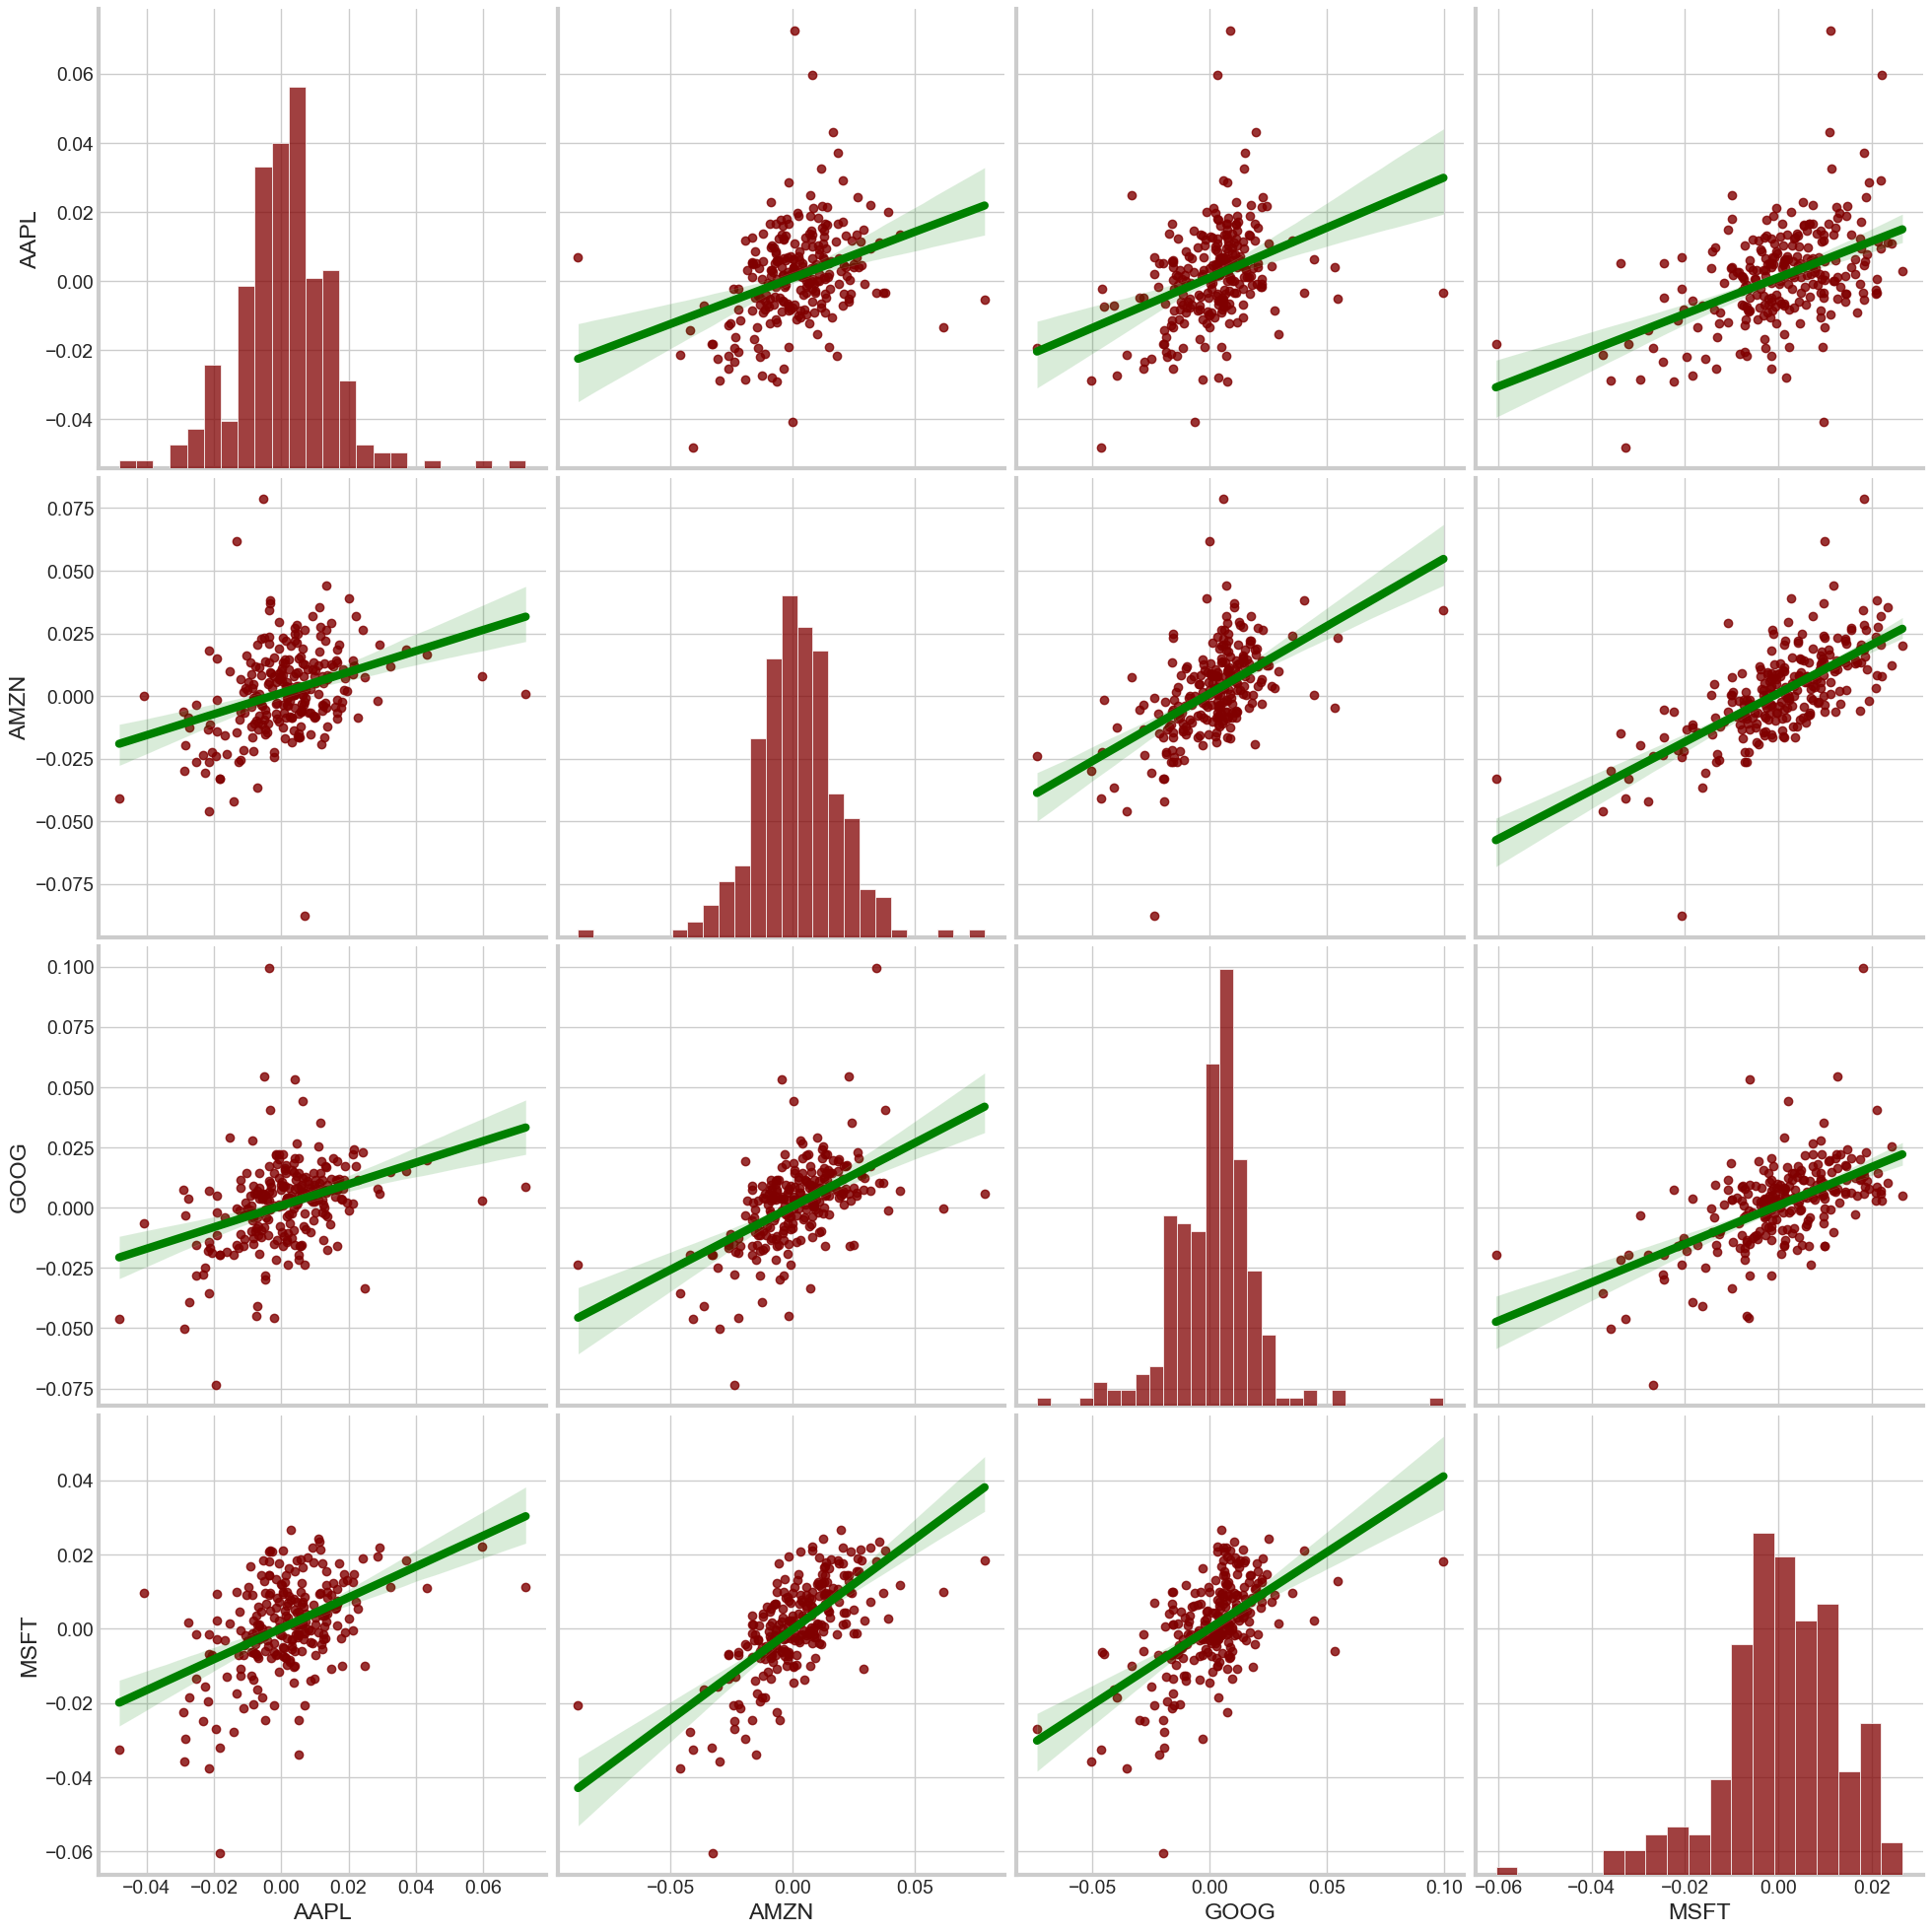

In [15]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons
sns.pairplot(tech_returns,kind='reg',
             plot_kws={'scatter_kws': {'color': 'maroon'}, 'line_kws': {'color': 'green'}}, diag_kws={'color': 'maroon'},
             height=5)

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

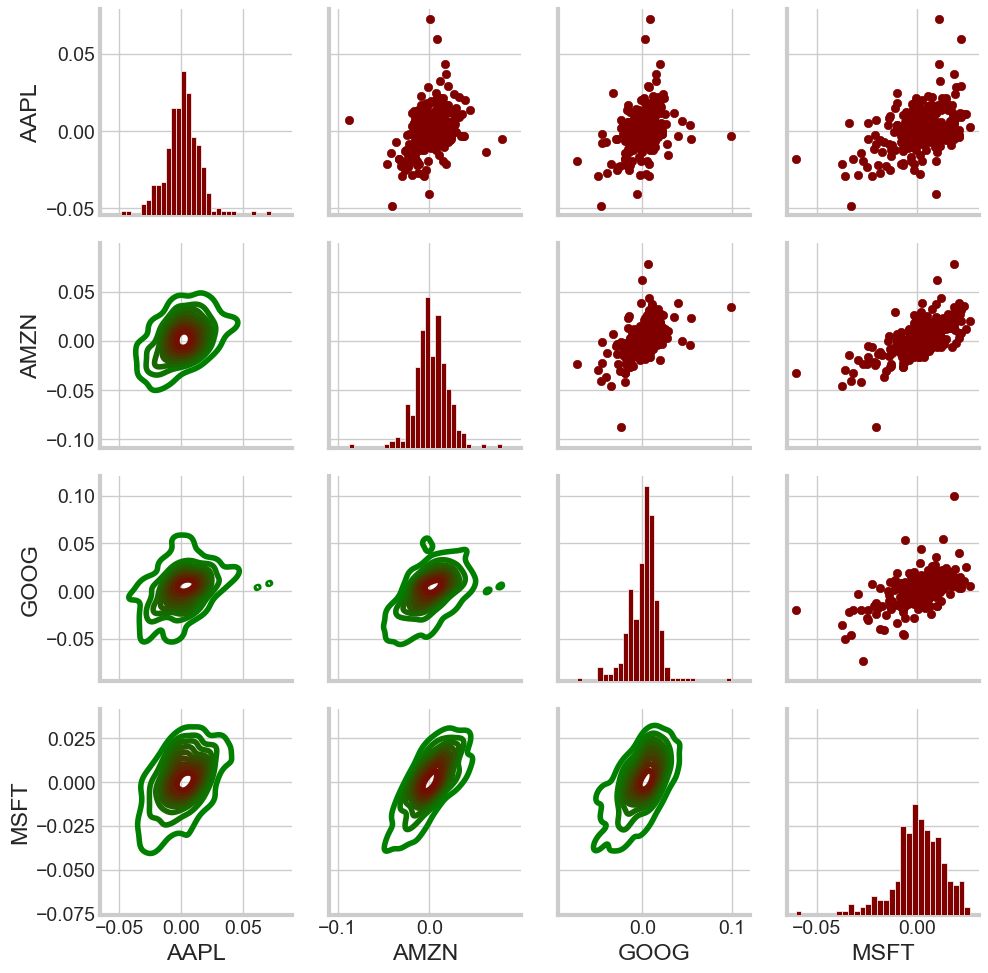

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig =sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter,color='maroon')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)  or the color map (Green Maroon)
return_fig.map_lower(sns.kdeplot,cmap=sns.blend_palette(["green","maroon"], as_cmap=True))

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist,bins=30,color='maroon')

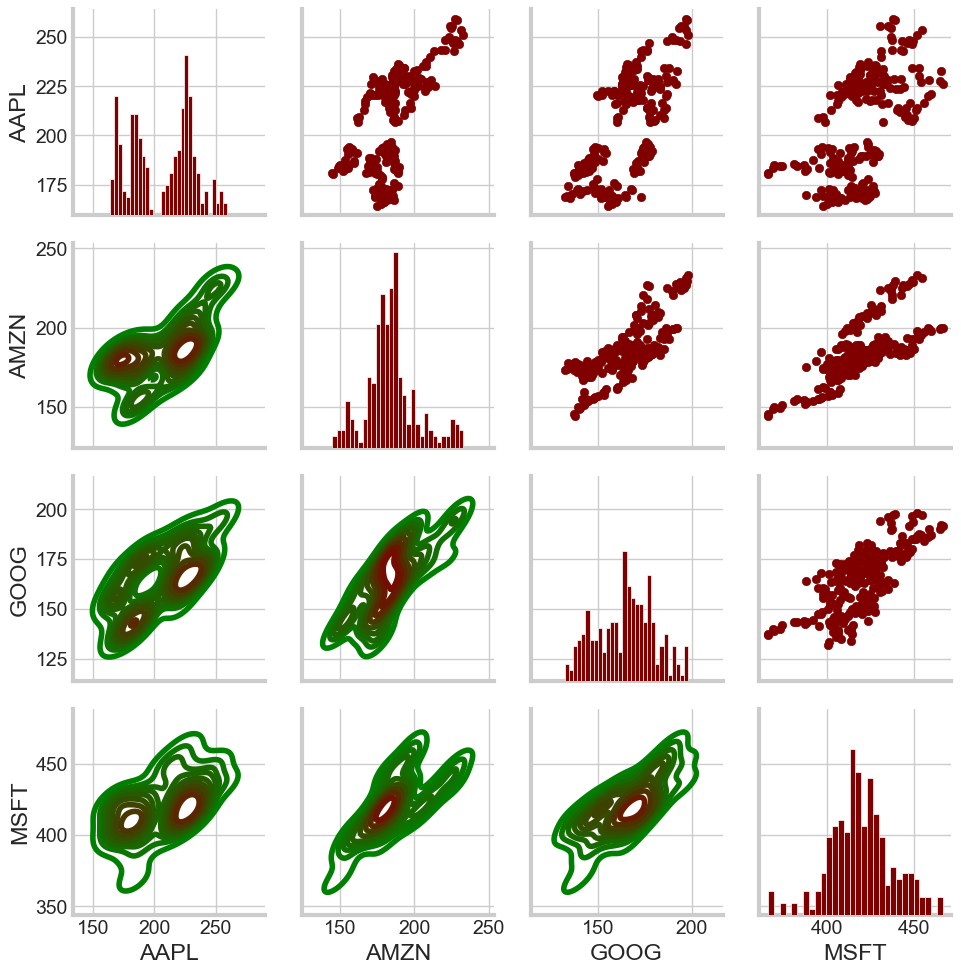

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig =sns.PairGrid(close_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter,color='maroon')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (Green Maroon)
return_fig.map_lower(sns.kdeplot,cmap=sns.blend_palette(["green","maroon"], as_cmap=True))

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist,bins=30,color='maroon')

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Amazon.

Text(0.5, 1.0, 'Correlation of Stock Closing Price')

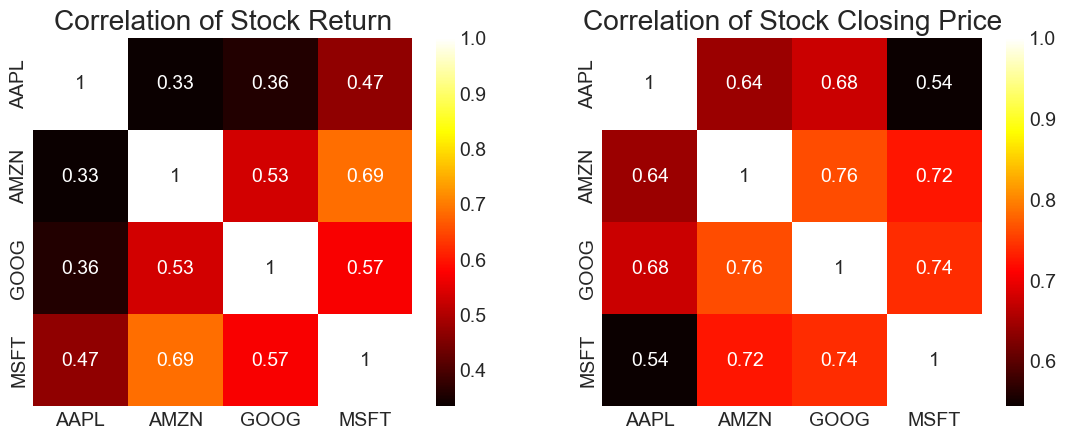

In [18]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_returns.corr(),annot=True,cmap='hot')
plt.title('Correlation of Stock Return')

plt.subplot(2,2,2)
sns.heatmap(close_df.corr(),annot=True,cmap='hot')
plt.title('Correlation of Stock Closing Price')

Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

## 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

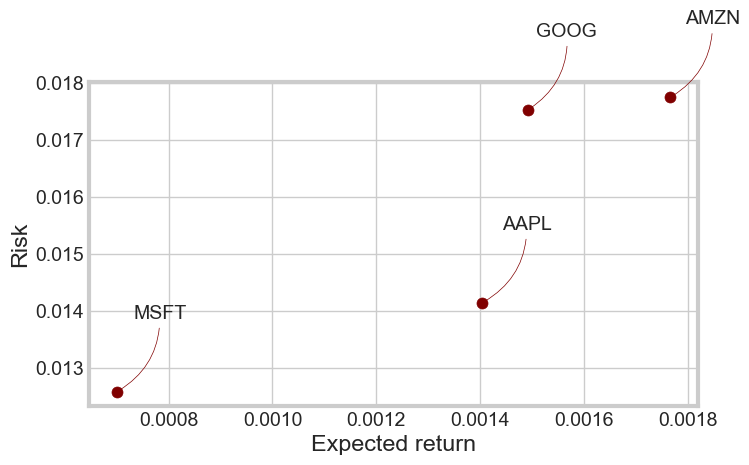

In [19]:
rets = tech_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(7,4))
plt.scatter(rets.mean(), rets.std(), s=area,color='maroon')
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', 
                 ha='right', va='bottom',arrowprops=dict(arrowstyle='-',color='maroon', 
                 connectionstyle='arc3,rad=-0.3'))

* Microsoft (MSFT) exhibits the lowest risk and expected return, suggesting it is the most stable among these stocks.
* Amazon (AMZN) has the highest expected return but also the highest risk, making it a more volatile option.

## 6. Predicting the closing price stock price of MICROSOFT :

In [20]:
df = pdr.get_data_yahoo('MSFT',start='2012-01-01',end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.162373,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.660402,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.881750,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.221674,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,21.929184,59706800
...,...,...,...,...,...,...
2024-12-20,433.109985,443.739990,428.630005,436.600006,436.600006,64263700
2024-12-23,436.739990,437.649994,432.829987,435.250000,435.250000,19152500
2024-12-24,434.649994,439.600006,434.190002,439.329987,439.329987,7164500


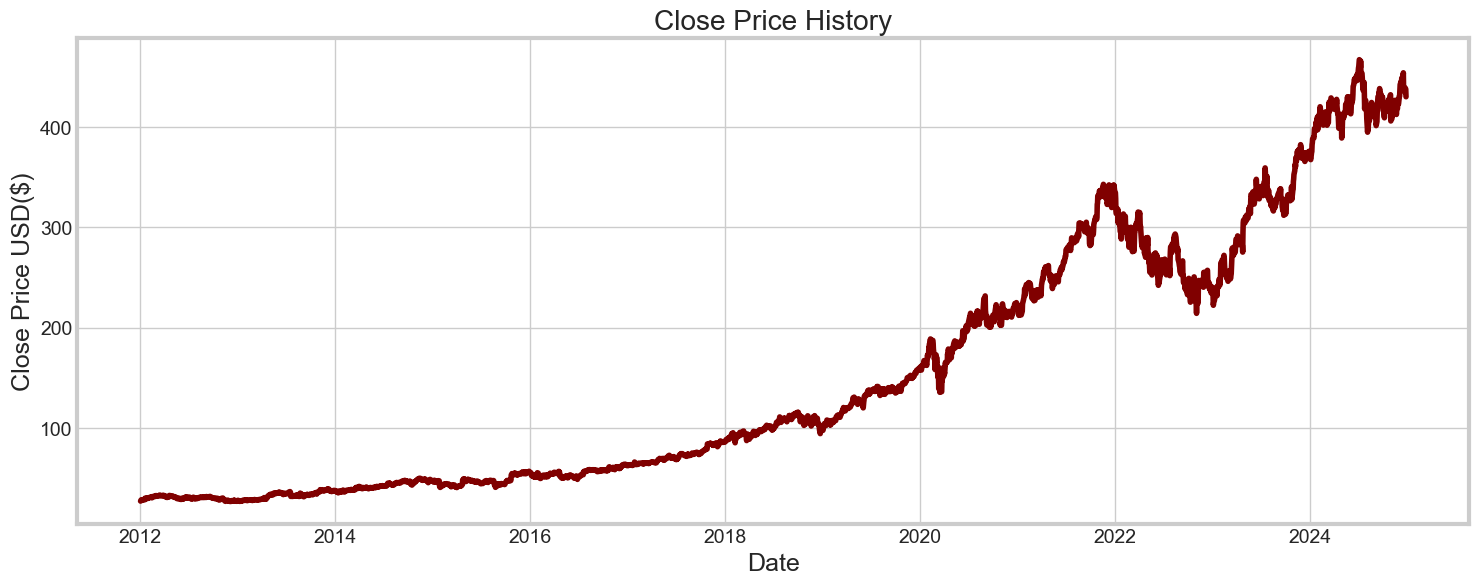

In [21]:
plt.figure(figsize=(16,6))
plt.title("Close Price History")
plt.plot(df['Close'],color='maroon')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [22]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
train_data_len = int(np.ceil(len(dataset)* .95))
train_data_len

3105

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[9.06638005e-04],
       [2.33459232e-03],
       [2.96924109e-03],
       ...,
       [9.36013937e-01],
       [9.33248686e-01],
       [9.16067909e-01]])

In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(train_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00090664, 0.00233459, 0.00296924, 0.00394388, 0.00310524,
       0.0033319 , 0.0030599 , 0.00369455, 0.0042612 , 0.00428387,
       0.00421587, 0.00396655, 0.00757043, 0.00761576, 0.00673179,
       0.00723044, 0.00709445, 0.00648246, 0.00734377, 0.00716245,
       0.00797842, 0.00811442, 0.00877173, 0.00868107, 0.00902106,
       0.0097237 , 0.00997303, 0.00936104, 0.00954237, 0.0087944 ,
       0.00834107, 0.01115166, 0.01106099, 0.01149165, 0.01110633,
       0.01133299, 0.01158231, 0.01128765, 0.01246628, 0.01217162,
       0.01341826, 0.01294227, 0.01230762, 0.01176364, 0.01239828,
       0.0127836 , 0.01273827, 0.01285161, 0.01427956, 0.01450622,
       0.01468754, 0.0141209 , 0.01321426, 0.01273827, 0.01255695,
       0.01276094, 0.0127836 , 0.01409823, 0.01393957, 0.01319159])]
[0.013032929430421614]

[array([0.00090664, 0.00233459, 0.00296924, 0.00394388, 0.00310524,
       0.0033319 , 0.0030599 , 0.00369455, 0.0042612 , 0.00428387,
       0.00421587, 0.00396655, 0.0

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Define the Model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the Model 
model.fit(x_train, y_train, batch_size=32, epochs=1)






96/96 [==============================] - 9s 54ms/step - loss: 0.0039


In [26]:
test_data=scaled_data[train_data_len-60:]
xtest=[]
ytest=dataset[train_data_len:,:]
for i in range(60,len(test_data)):
    xtest.append(test_data[i-60:i,0])
    
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

predictions = model.predict(xtest)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean((predictions - ytest) ** 2))  # Correct RMSE formula
print("RMSE:", rmse)

6/6 [==============================] - 1s 21ms/step
RMSE: 12.234690010956378


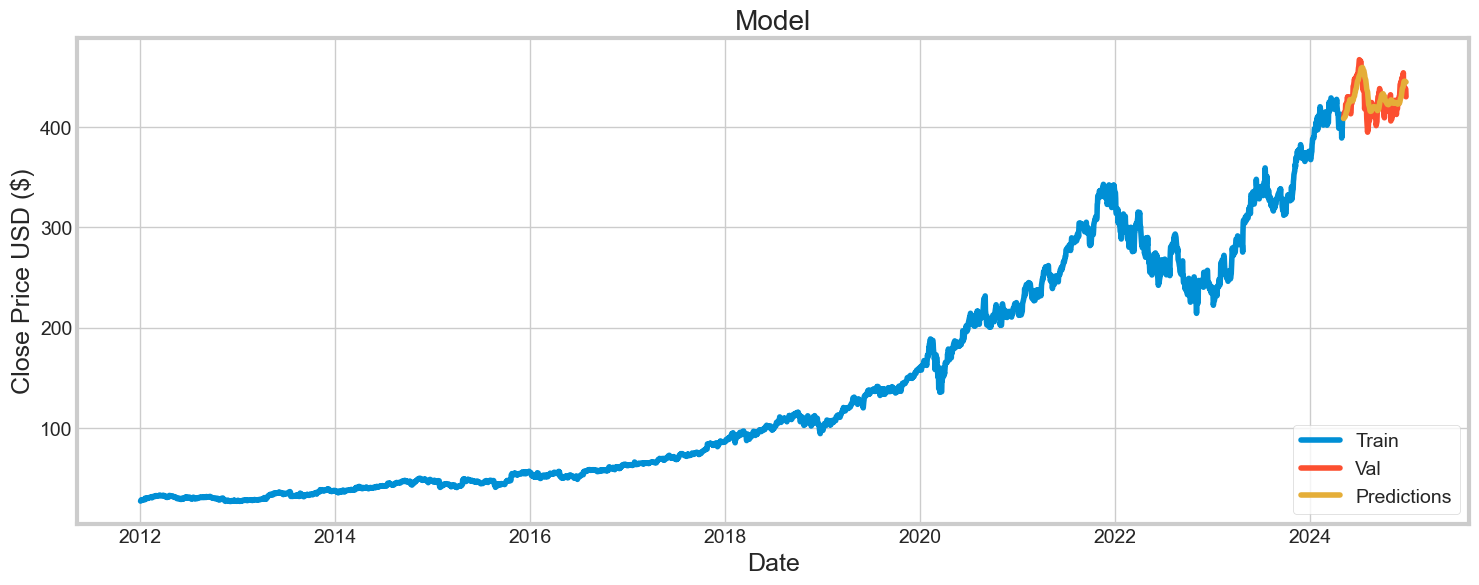

In [27]:
# Plot the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
valid

,Close,Predictions
Date,,
2024-05-07,409.339996,408.851196
2024-05-08,410.540009,408.907227
2024-05-09,412.320007,409.226990
2024-05-10,414.739990,409.781433
2024-05-13,413.720001,410.565521
...,...,...
2024-12-20,436.600006,445.894989
2024-12-23,435.250000,446.058258
2024-12-24,439.329987,445.866547
